# Business Analytics - Assignment 2  

**Assignment Points**: 100    
**Due Date**: Friday of Week 10 (16 May 2025) at 11:55pm   




---

## Use of Resources and Technologies Including Generative Artificial Interlligence


For this assessment, students are not permitted to use generative artificial intelligence tools (GAITs), such as ChatGPT, with the exception of the following limited purposes:

- Generating preliminary ideas for writing or programming
- Editing or improving writing, including grammar and sentence structure


Students must not use GAITs to:

- Support analytical decisions or evaluate outcomes
- Interpret or analyse data outputs, e.g., figures or tables 
- Generate marketing strategies or targeted recommendations

Use of GAITs beyond the permitted scope will be considered a breach of academic integrity and may be reported as plagiarism. If students use GAITs for approved tasks, the output must be edited and rewritten to show their own work.


---

## Assignment Description

You are employed by a large national gym chain to perform customer segmentation analysis. You are provided with a dataset of 2,000 gym members, collected through their membership details. The dataset includes variables such as age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures and identify distinct customer segments within the dataset. 

You will then compile your results into tables and charts and writeup a report of up to **1,000 words** (excluding tables and figures). Ensure your report is informative, intuitive, and easily understandable for management, who may not have a technical background.

---

## Word Count

- Include the total word count at the beginning of your report.  
- The word count applies to the main body of the report and excludes tables and figures.

Deductions for non-compliance:
- 5 marks deducted if the word count is missing (and iLearn's default word count will apply)  
- 5 marks deducted if the report exceeds the word limit by 50–100 words  
- 10 marks deducted if the report exceeds the word limit by more than 100 words

---


## Report Appearance (15 Marks)

Ensure that all tables and charts in your report are clearly formatted, informative, and easy to interpret. The following guidelines should be followed:

1. Titles for tables and figures are clear and descriptive, e.g. Table 1: Summary Statistics
2. No raw Python output is allowed; all tables are cleanly formatted  
3. Values in tables are rounded to three decimal places  
4. All charts have properly labelled axes  
5. All charts and tables are discussed and referenced in the text  (do not include irrelevant content)
6. Font, layout, and formatting are professional, consistent, and easy to read  
7. The overall report has a clean, professional look and feel  


---

## Tasks (85 Marks)

Your report should address the questions listed below under the following headings:

1. **Introduction** (5 marks)
    - Describe the problem, explain what you aim to achieve by solving it, outline the approach you will take to address it, etc.
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on key summary statistics, etc.
    - Provide tables and charts (e.g. histograms, pie and bar charts) where appropriate.
3. **Customer Segmentation** (35 marks)
    - Standardise the two numeric variables before performing clustering.  
    - Determine the optimal number of customer segments using the Elbow Method and three well-chosen Silhouette Plots.  
    - Once the optimal number of clusters is identified, apply both K-means++ and Agglomerative Clustering using all variables.  
      - Do not apply any dimensionality reduction. Zero marks will be awarded if this instruction is not followed.  
    - For each clustering technique, provide a summary table showing:  
      - Interpretable cluster centres.  
      - The number of customers in each cluster.
4. **Segment Interpretation and Naming** (10 marks)
    - Using the cluster tables from Question 3, interpret each group by analysing customer attributes. Use as many attributes as possible to build a clear profile of each cluster. Do this for both clustering techniques. Based on these profiles, assign meaningful and intuitive names to each segment.
     - Compare the customer segments identified by the two techniques. Do any clusters overlap?
5. **Marketing Recommendations Based on Customer Segments Identified via K-means++** (10 marks)
    - Provide at least three targeted marketing recommendations for each segment. Ensure your recommendations are:
        - Specific, practical, and actionable.
        - Aligned with each segment’s profile and potential needs.
6. **Conclusion** (5 marks)
    - A summary of what you have done in the report. 
    
---
---


## Assignment Submission

You must submit **two files**:

1. **PDF Report**  
   Submit a PDF document containing your final report intended for company management. This report should be clear, well-structured, and include all relevant tables and charts produced during your analysis. It is recommended that you draft your report in Word and convert it to PDF before submission. *(This report will be formally marked.)*

2. **Jupyter Notebook**  
   Submit your Jupyter Notebook containing the Python code used in your analysis. Your code should be clean, well-commented, and capable of reproducing all outputs (tables and figures) shown in your report. *(This notebook will be reviewed to verify the analysis presented in your report.)*


## 1. Data Preparation

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

# Suppress warnings (e.g., FutureWarning from sklearn or pandas)
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
df = pd.read_csv('data/data.csv')
df.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2


In [7]:
# Check the structure of the dataset and for any missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64

In [8]:
# Check unique values in each column
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col} - Unique values: {unique_vals}")

Gender - Unique values: [1 0]
Marital Status - Unique values: [1 0]
Age - Unique values: [39 29 35 56 45 40 49 53 54 31 41 32 26 44 50 28 48 33 36 37 43 34 42 24
 52 59 38 55 51 47 22 58 46 30 61 27 62 23 60 57 74 63 66 20 64 65 25 70
 76 21 71]
Education - Unique values: [2 1 0 3]
Income - Unique values: [130568  80315 107067 ... 144512  87071 104537]
Occupation - Unique values: [1 0 2]
Settlement Size - Unique values: [2 0 1]


In [9]:
# Clean and Safe Mapping from Scratch
# Define mapping dictionaries
gender_map = {0: 'Male', 1: 'Female'}
marital_map = {0: 'Single', 1: 'Non-single'}
education_map = {0: 'Other/Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}
occupation_map = {0: 'Unemployed/Unskilled', 1: 'Skilled Employee/Official', 2: 'Management/Self-employed/Qualified'}
settlement_map = {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}

# Apply mappings safely with fallback to 'Unknown'
df['Gender'] = df['Gender'].map(gender_map).fillna('Unknown')
df['Marital Status'] = df['Marital Status'].map(marital_map).fillna('Unknown')
df['Education'] = df['Education'].map(education_map).fillna('Unknown')
df['Occupation'] = df['Occupation'].map(occupation_map).fillna('Unknown')
df['Settlement Size'] = df['Settlement Size'].map(settlement_map).fillna('Unknown')

# Optional: check result
df[['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']].head()

,Gender,Marital Status,Education,Occupation,Settlement Size
0,Female,Non-single,University,Skilled Employee/Official,Big City
1,Male,Single,High School,Unemployed/Unskilled,Small City
2,Female,Single,Other/Unknown,Unemployed/Unskilled,Small City
3,Male,Non-single,University,Skilled Employee/Official,Small City
4,Female,Non-single,University,Skilled Employee/Official,Big City


## 2. Exploratory Data Analysis

### 2.1 Summary Statistics

In [12]:
# Summary statistics for numeric variables
df.describe()

,Age,Income
count,2000.000000,2000.000000
mean,40.823500,137516.196500
std,9.455848,46184.296588
min,20.000000,35832.000000
25%,33.000000,101262.750000
50%,40.000000,133004.000000
75%,48.000000,171232.500000
max,76.000000,309364.000000


### 2.2 Univariate Analysis

#### 2.2.1 Age and Income distributions

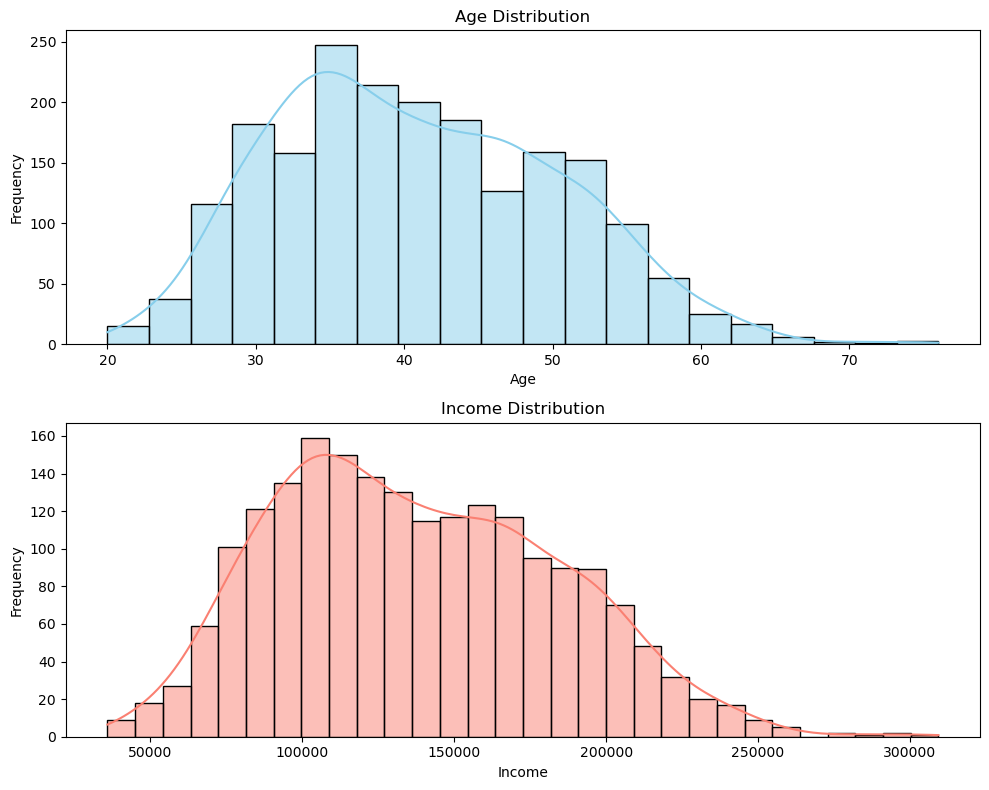

In [15]:
# Create two subplots in one figure: Age and Income distributions
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Age histogram
sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Income histogram
sns.histplot(df['Income'], bins=30, kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Income Distribution')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 2.2.2 Categorical Variable Distribution

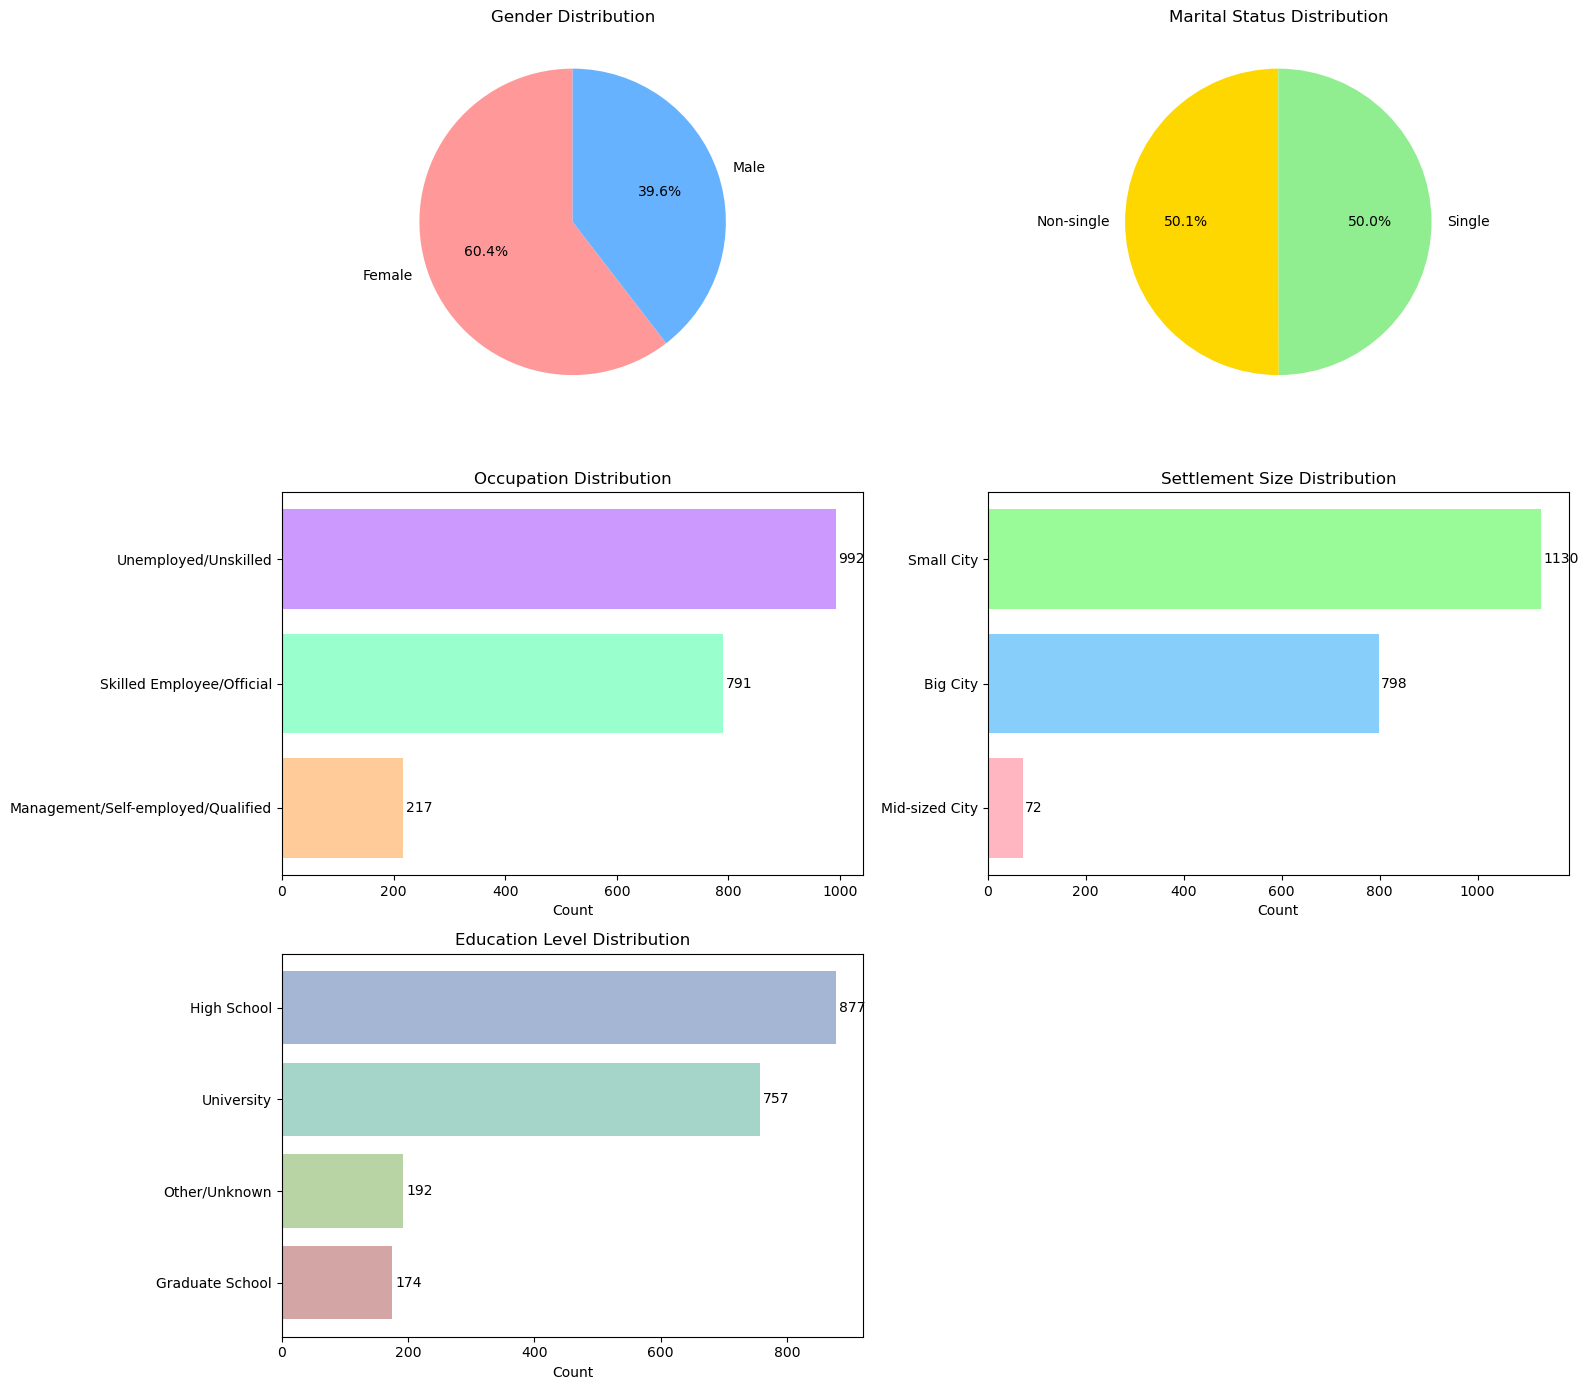

In [17]:
# Categorical Variable Distribution
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# PIE CHART 1: Gender
gender_counts = df['Gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
               startangle=90, colors=['#FF9999', '#66B2FF'])
axes[0, 0].set_title('Gender Distribution')

# PIE CHART 2: Marital Status
marital_counts = df['Marital Status'].value_counts()
axes[0, 1].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%',
               startangle=90, colors=['#FFD700', '#90EE90'])
axes[0, 1].set_title('Marital Status Distribution')

# BAR CHART 1: Occupation
occ_counts = df['Occupation'].value_counts().sort_values()
bars_occ = axes[1, 0].barh(occ_counts.index, occ_counts.values,
                           color=['#FFCC99', '#99FFCC', '#CC99FF'])
axes[1, 0].set_title('Occupation Distribution')
axes[1, 0].set_xlabel('Count')
for bar in bars_occ:
    width = bar.get_width()
    axes[1, 0].text(width + 5, bar.get_y() + bar.get_height()/2,
                    f'{int(width)}', va='center')

# BAR CHART 2: Settlement Size
settlement_counts = df['Settlement Size'].value_counts().sort_values()
bars_settle = axes[1, 1].barh(settlement_counts.index, settlement_counts.values,
                              color=['#FFB6C1', '#87CEFA', '#98FB98'])
axes[1, 1].set_title('Settlement Size Distribution')
axes[1, 1].set_xlabel('Count')
for bar in bars_settle:
    width = bar.get_width()
    axes[1, 1].text(width + 5, bar.get_y() + bar.get_height()/2,
                    f'{int(width)}', va='center')

# BAR CHART 3: Education Level
edu_counts = df['Education'].value_counts().sort_values()
bars_edu = axes[2, 0].barh(edu_counts.index, edu_counts.values,
                           color=['#D4A5A5', '#B8D4A5', '#A5D4C8', '#A5B5D4'])
axes[2, 0].set_title('Education Level Distribution')
axes[2, 0].set_xlabel('Count')
for bar in bars_edu:
    width = bar.get_width()
    axes[2, 0].text(width + 5, bar.get_y() + bar.get_height()/2,
                    f'{int(width)}', va='center')

axes[2, 1].axis('off')
plt.tight_layout()
plt.show()

### 2.3 Bivariate & Multivariate Analysis

#### 2.3.1 Correlation Plot

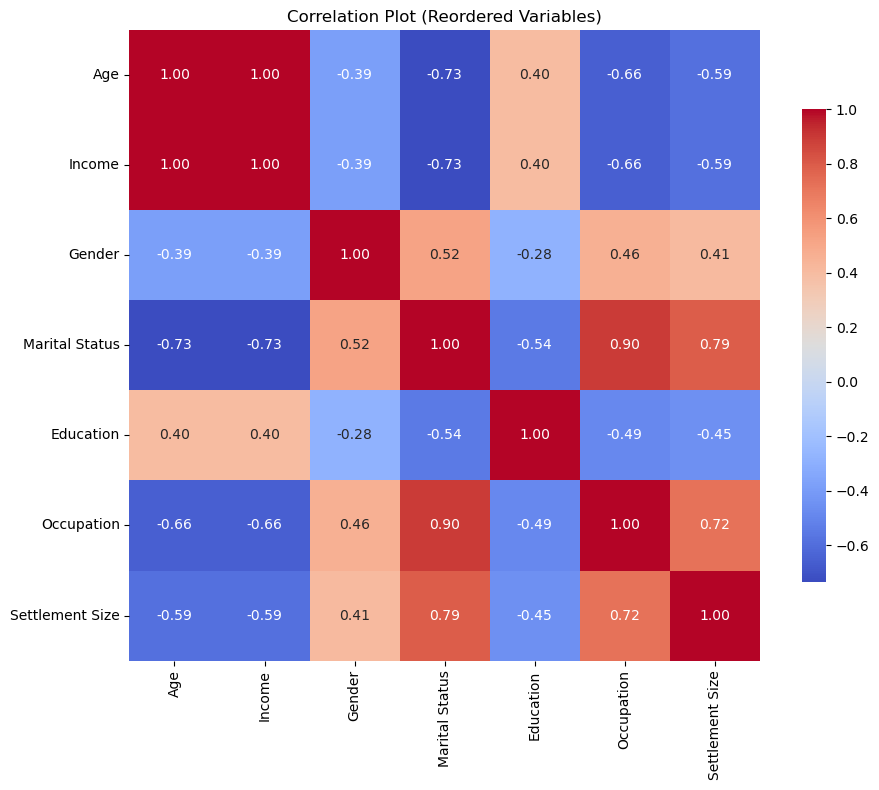

In [20]:
# Reorder correlation matrix based on preferred variable order
ordered_columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

# Encode again for consistency
df_corr = df.copy()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

# Reorder columns
df_corr = df_corr[ordered_columns]

# Compute correlation matrix
corr_matrix_ordered = df_corr.corr()

# Plot the reordered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ordered, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Plot (Reordered Variables)')
plt.tight_layout()
plt.show()

#### 2.3.2 Average Income by Occupation with value labels

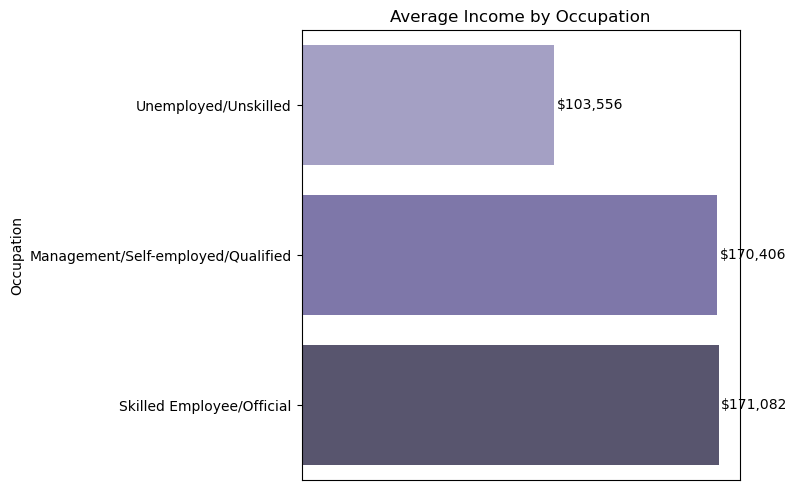

In [22]:
# 2.3.2 Average Income by Occupation (tanpa angka sumbu X, pakai label di bar saja)
plt.figure(figsize=(8, 5))
avg_income_occ = df.groupby('Occupation')['Income'].mean().sort_values()
barplot = sns.barplot(x=avg_income_occ.values, y=avg_income_occ.index, palette='Purples_d')

# Add text labels to each bar
for i, v in enumerate(avg_income_occ.values):
    barplot.text(v + 1000, i, f"${int(v):,}", va='center')

# Remove x-axis ticks/labels
barplot.set_xticks([])
barplot.set_xlabel('')
plt.title('Average Income by Occupation')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

#### 2.3.3 Age vs Income by Education and Occupation

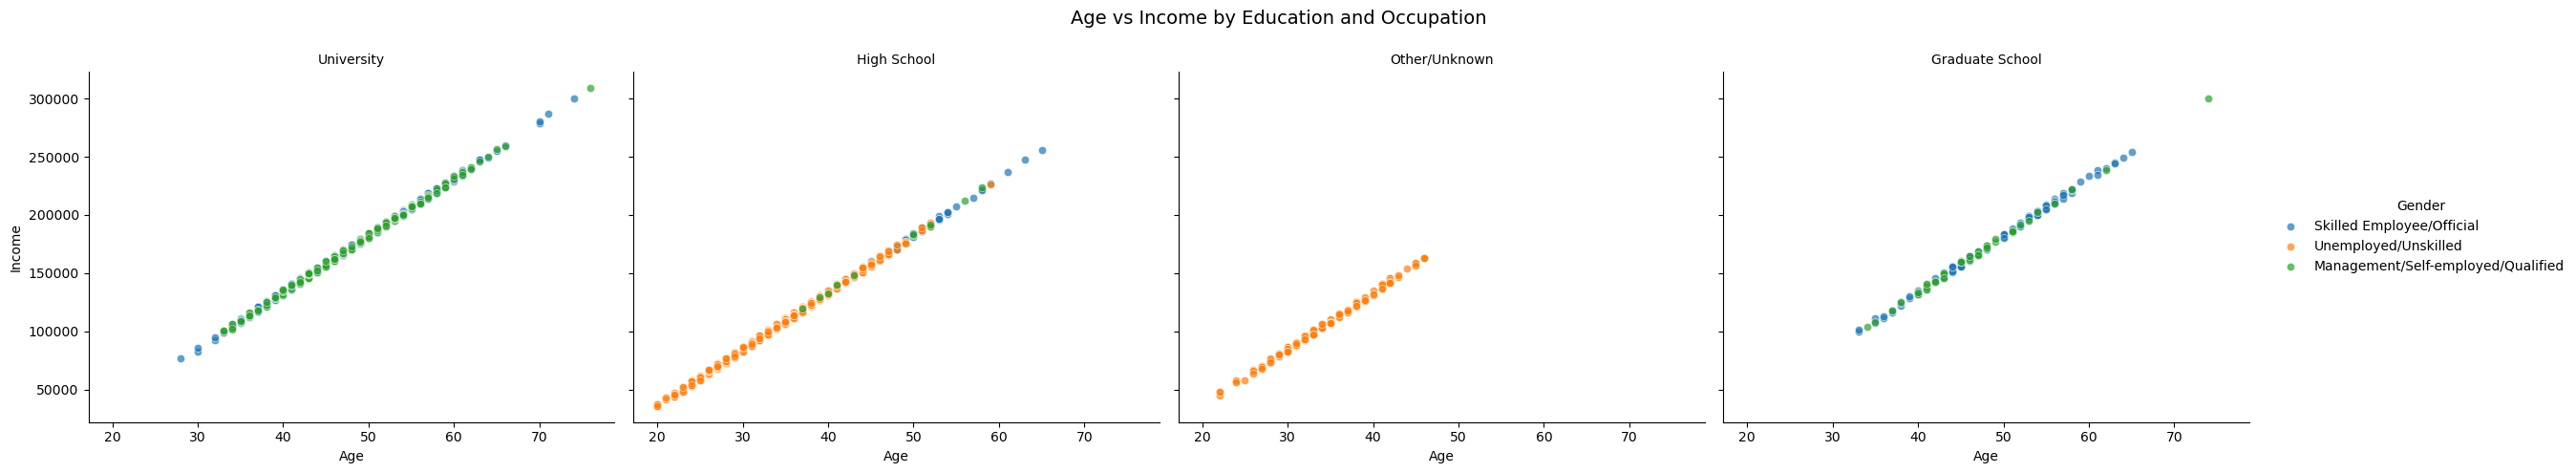

In [24]:
# Setup facet grid by Settlement Size
g = sns.FacetGrid(df, col="Education", hue="Occupation", height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="Age", y="Income", alpha=0.7)
g.add_legend(title="Gender")
g.set_axis_labels("Age", "Income")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Age vs Income by Education and Occupation", fontsize=14)
plt.show()

### 2.4 Outlier Detection

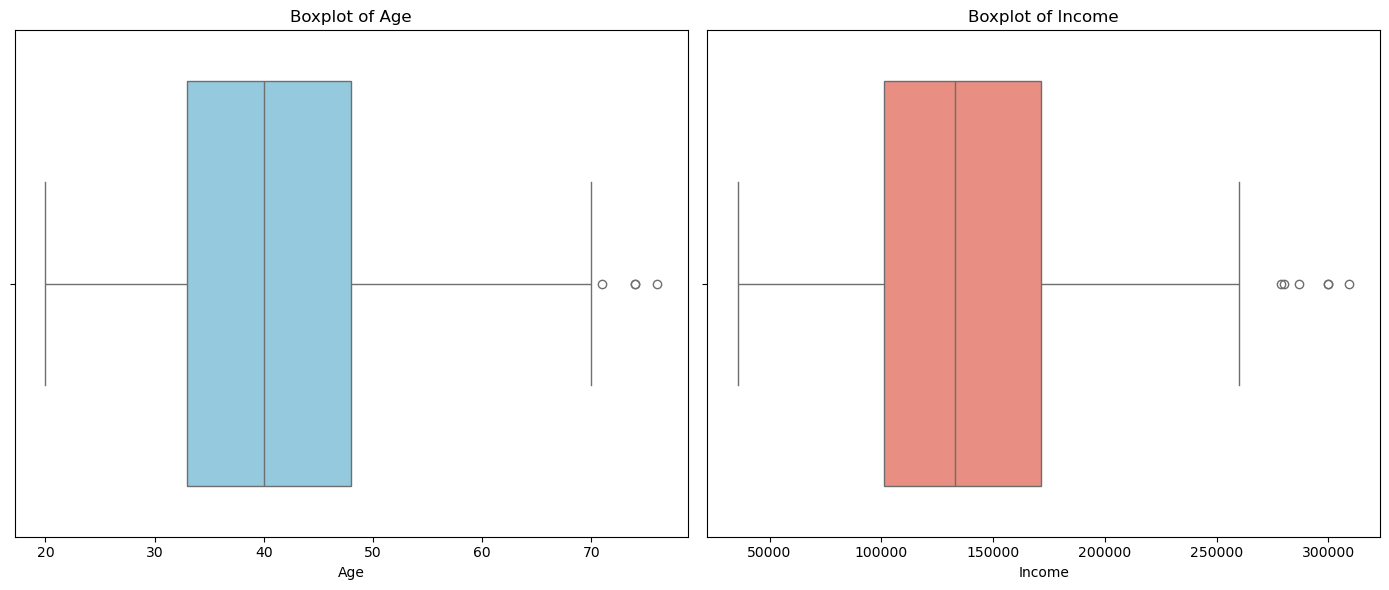

In [26]:
# Create two separate boxplots for Age and Income
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Age
sns.boxplot(data=df, x='Age', ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Age')
axes[0].set_xlabel('Age')

# Boxplot for Income
sns.boxplot(data=df, x='Income', ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Income')
axes[1].set_xlabel('Income')

plt.tight_layout()
plt.show()

## 3. Customer Segmentation

### 3.1 Standardisation of Numerical Variables

In [29]:
# Select only numerical columns to standardise
numerical_cols = ['Age', 'Income']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Convert to DataFrame for easier viewing (optional)
import pandas as pd
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
df_scaled.head()

,Age,Income
0,-0.192892,-0.150483
1,-1.250703,-1.238852
2,-0.616016,-0.659462
3,1.605387,1.656471
4,0.441795,0.446623


### 3.2 Determining the Optimal Number of Clusters

#### 3.2.1 Elbow Method.


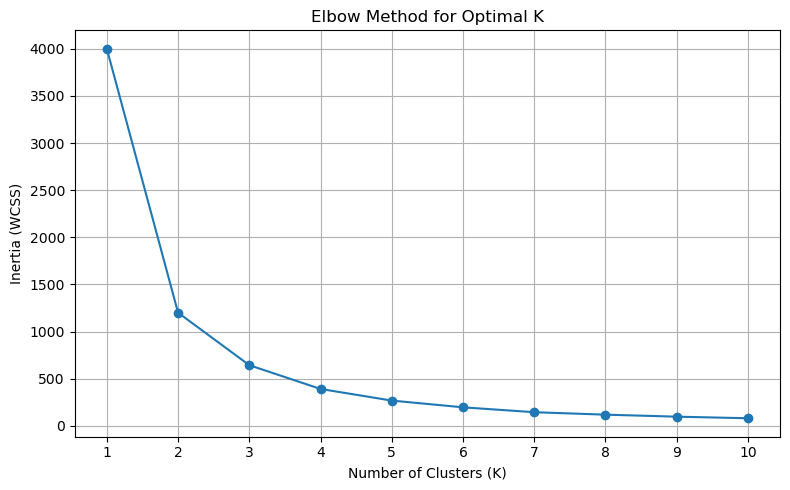

In [32]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.2.2 Silhouette Scorel.

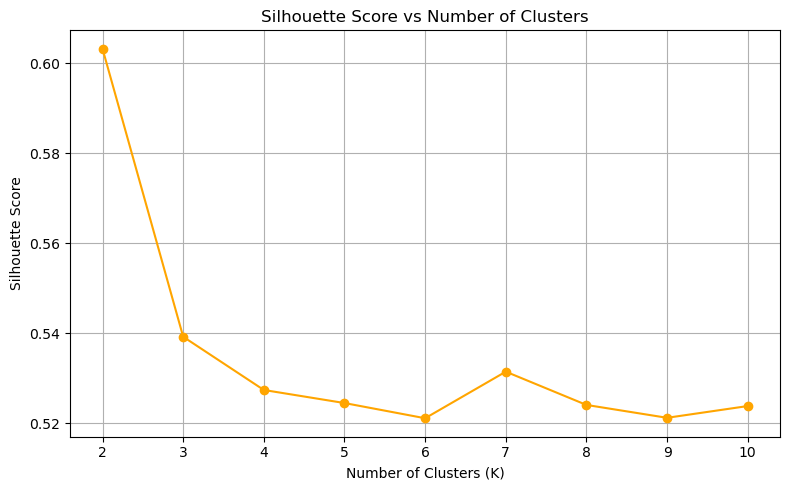

In [34]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.2.3 Silhouette Diagrams

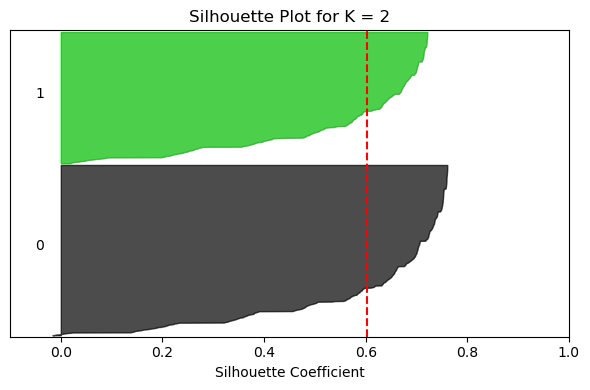

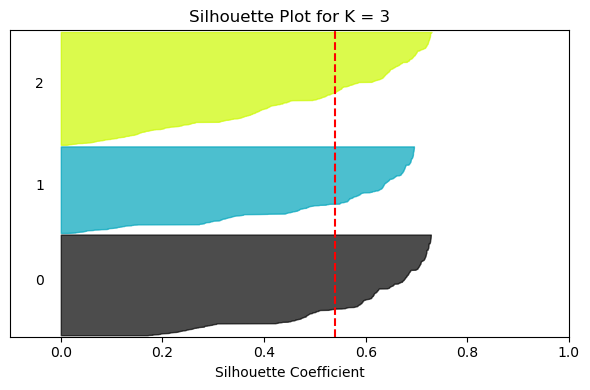

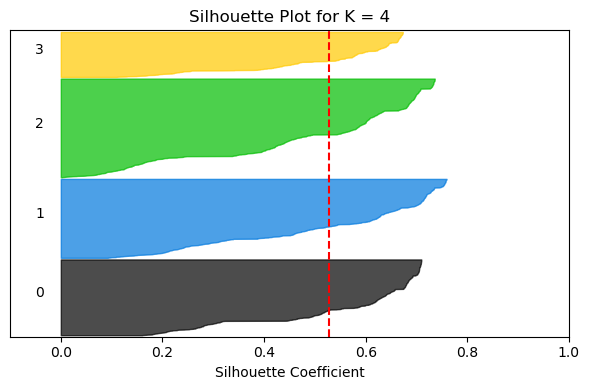

In [36]:
# Function to plot silhouette diagram for any K
def plot_silhouette_diagram(k, data):
    fig, ax1 = plt.subplots(figsize=(6, 4))

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_values.sort()

        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette Plot for K = {k}")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1.0])
    ax1.set_ylim([0, len(data) + (k + 1) * 10])
    plt.tight_layout()
    plt.show()

# Plot silhouette diagrams for K = 2, 3, 4
for k in [2, 3, 4]:
    plot_silhouette_diagram(k, df_scaled)

###  3.3. Apply two clustering methods with K = 3

#### 3.3.1 Standardisation

In [39]:
# Apply KMeans++ algorithm with K = 3
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels_kmeans = kmeans_model.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df_scaled['Cluster_KMeans'] = cluster_labels_kmeans

df_scaled[['Age', 'Income', 'Cluster_KMeans']].head()

,Age,Income,Cluster_KMeans
0,-0.192892,-0.150483,2
1,-1.250703,-1.238852,0
2,-0.616016,-0.659462,0
3,1.605387,1.656471,1
4,0.441795,0.446623,2


In [40]:
# Apply Agglomerative Clustering with K = 3
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels_agglo = agglo_model.fit_predict(df_scaled.drop(columns=['Cluster_KMeans'], errors='ignore'))

# Add cluster labels to the dataframe
df_scaled['Cluster_Agglo'] = cluster_labels_agglo

# Show a preview to validate clustering result
df_scaled[['Age', 'Income', 'Cluster_Agglo']].head()

,Age,Income,Cluster_Agglo
0,-0.192892,-0.150483,0
1,-1.250703,-1.238852,0
2,-0.616016,-0.659462,0
3,1.605387,1.656471,1
4,0.441795,0.446623,2


#### 3.3.2 K-Means++ Clustering (K = 3)

In [42]:
# add cluster to df
df['Cluster_KMeans'] = cluster_labels_kmeans 
kmeans_summary = df.groupby('Cluster_KMeans').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Gender': lambda x: x.mode().iloc[0],
    'Marital Status': lambda x: x.mode().iloc[0],
    'Education': lambda x: x.mode().iloc[0],
    'Occupation': lambda x: x.mode().iloc[0],
    'Settlement Size': lambda x: x.mode().iloc[0],
})

kmeans_summary['Count'] = df['Cluster_KMeans'].value_counts().sort_index()
kmeans_summary['Age'] = kmeans_summary['Age'].round(2)
kmeans_summary['Income'] = kmeans_summary['Income'].round(2)

kmeans_summary

,Age,Income,Gender,Marital Status,Education,Occupation,Settlement Size,Count
Cluster_KMeans,,,,,,,,
0,30.72,88189.26,Male,Single,High School,Unemployed/Unskilled,Small City,671
1,52.71,195566.24,Female,Non-single,University,Skilled Employee/Official,Big City,577
2,40.72,136988.94,Female,Non-single,University,Unemployed/Unskilled,Small City,752


#### 3.3.2 Agglomerative Clustering (K = 3)

In [44]:
# Apply Agglomerative Clustering to scaled data
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Agglo_Cluster'] = agglo_model.fit_predict(df_scaled)

# Group data by Agglo cluster and compute summary
agglo_summary = df.groupby('Agglo_Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Gender': lambda x: x.mode()[0],
    'Marital Status': lambda x: x.mode()[0],
    'Education': lambda x: x.mode()[0],
    'Occupation': lambda x: x.mode()[0],
    'Settlement Size': lambda x: x.mode()[0],
})

# Add cluster sizes
agglo_summary['Count'] = df['Agglo_Cluster'].value_counts().sort_index().values

# Round numerical values
agglo_summary['Age'] = agglo_summary['Age'].round(3)
agglo_summary['Income'] = agglo_summary['Income'].round(3)

# Display the summary table
agglo_summary


,Age,Income,Gender,Marital Status,Education,Occupation,Settlement Size,Count
Agglo_Cluster,,,,,,,,
0,48.401,174516.608,Female,Non-single,University,Skilled Employee/Official,Big City,1031
1,30.717,88189.256,Male,Single,High School,Unemployed/Unskilled,Small City,671
2,37.366,120573.084,Male,Single,High School,Unemployed/Unskilled,Small City,298


## 4. Segment Interpretation and Naming

### 4.1 Mapping Table (Segment Naming)

In [47]:
# Optional: define segment names (for reference use in report)
kmeans_names = {
    0: "Young Budget-Conscious",
    1: "Affluent Professionals",
    2: "Stable Mid-Level Members"
}

agglo_names = {
    0: "Value-Oriented Members",  # Same as KMeans Cluster 0
    1: "Split Affluent Group",    # Partial overlap with KMeans Cluster 1
    2: "Mixed Mid-to-High Earners"  # Blend of KMeans 1 and 2
}

print("KMeans++ Segment Names:")
print(kmeans_names)

print("\nAgglomerative Segment Names:")
print(agglo_names)

KMeans++ Segment Names:
{0: 'Young Budget-Conscious', 1: 'Affluent Professionals', 2: 'Stable Mid-Level Members'}

Agglomerative Segment Names:
{0: 'Value-Oriented Members', 1: 'Split Affluent Group', 2: 'Mixed Mid-to-High Earners'}


### 4.2 Cross-tab Comparison Table

In [49]:
# Cross-tab to compare which KMeans clusters map to which Agglo clusters
pd.crosstab(df['Cluster_KMeans'], df['Agglo_Cluster'])

Agglo_Cluster,0,1,2
Cluster_KMeans,,,
0,0,671,0
1,577,0,0
2,454,0,298


### 4.3 Visual Scatterplot Comparison

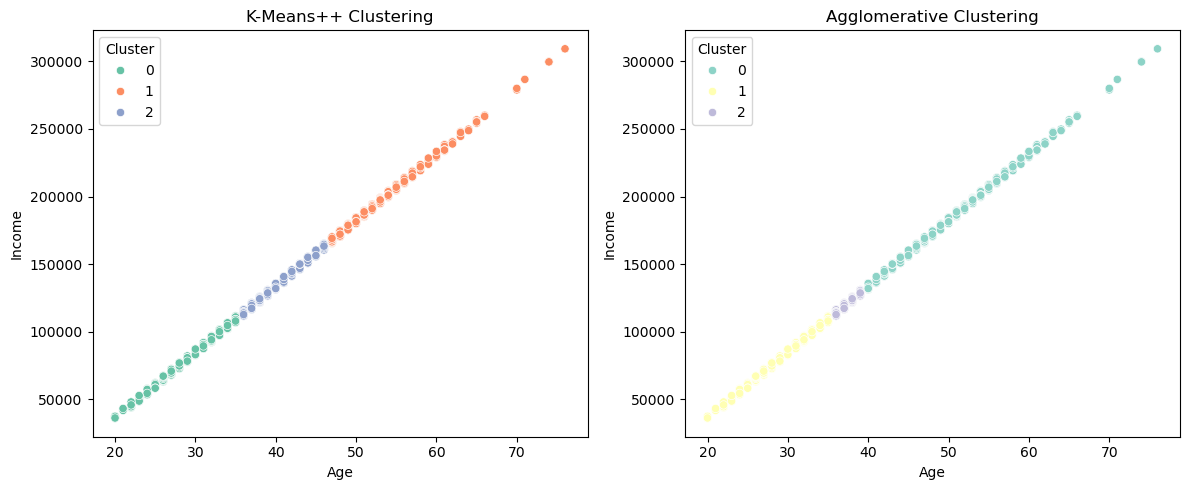

In [51]:
# Plot KMeans clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Income', hue='Cluster_KMeans', data=df, palette='Set2')
plt.title('K-Means++ Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')

# Plot Agglomerative clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Income', hue='Agglo_Cluster', data=df, palette='Set3')
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()